In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os, fnmatch

import scipy
from scipy.io import wavfile
from scipy import signal
from scipy.fft import fftshift,dct
from scipy import interpolate

ModuleNotFoundError: No module named 'pandas'

In [ ]:
#function for LP filtering and writing filtered files

def filter_file(directory,name,fc,filter_order,directory_out):
    """
    fc - cutoff frequency
    filter_order - the order of the Butterworth filter
    directory_out - directory in which write filtered files
    """
    fs, fin = wavfile.read(directory+name)
    w = fc / (fs / 2)                               # Normalize the frequency
    b, a = signal.butter(filter_order, w, 'low')
    fout = signal.filtfilt(b, a, fin)
    
    #creating new filename by adding '_filt' at the end
    index = name.find('.wav')
    name_out = name[:index]+'_filt'+name[index:]
    wavfile.write(directory_out+name_out, fs, fout.astype(np.int16))

In [ ]:
set_a = pd.read_csv('D:/Учеба/Технопарк/Heart/set_a.csv')
set_b = pd.read_csv('D:/Учеба/Технопарк/Heart/set_b.csv')
set_a_t = pd.read_csv('D:/Учеба/Технопарк/Heart/set_a_timing.csv')

In [ ]:
df = pd.concat([set_a,set_b])

In [ ]:
df.label.value_counts()

In [ ]:
df.isnull().sum()

In [ ]:
categories = df.groupby(['label','dataset']).count()
plot = categories.unstack().reindex(categories.unstack().sum(axis=1).sort_values().index)\
        .plot(kind='bar', stacked=False, title="Number of Audio Samples per Category", figsize=(16,5))

plot.set_xlabel('class')
plot.set_ylabel('samples count')

In [ ]:
categories.unstack()

# Фильтрация

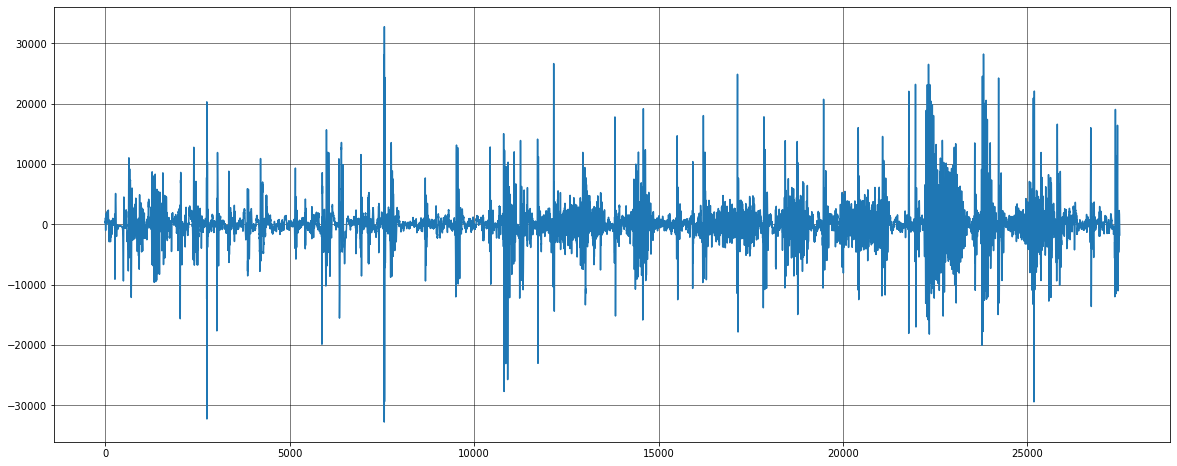

In [2]:
fs, data = wavfile.read('D:/Учеба/Технопарк/Heart/set_b/normal_noisynormal_125_1306332456645_B1.wav') # words/9.wav

plt.figure(figsize=(20,8))
plt.plot(data)
plt.grid(color='k', linestyle='-', linewidth=0.5)

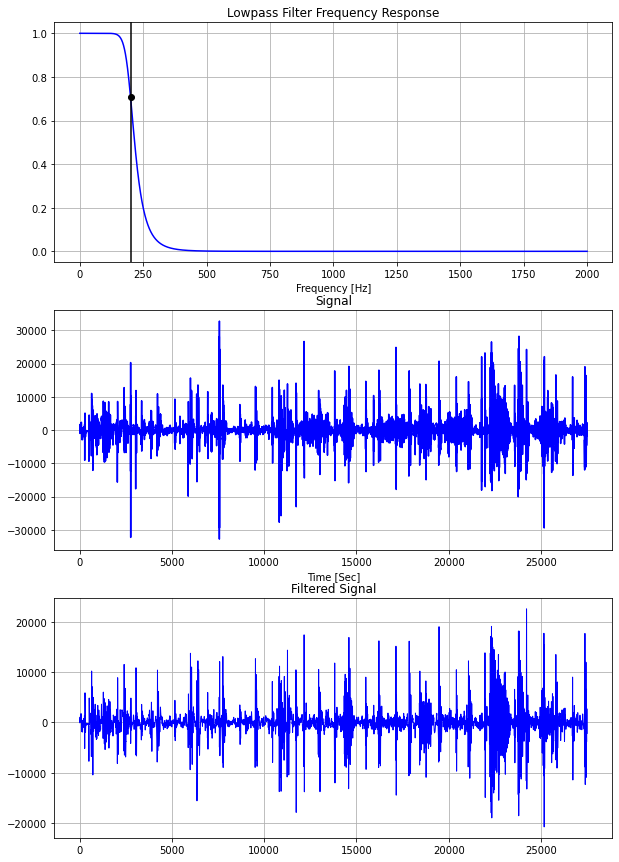

In [3]:
fc = 200  # Cut-off frequency of the filter
w = fc / (fs / 2) # Normalize the frequency
b, a = signal.butter(7, w, 'low')
y = signal.filtfilt(b, a, data)

fig,(ax0,ax1,ax2) = plt.subplots(3,1,figsize=(10,15))

w, h = signal.freqz(b, a, worN=8000)
ax0.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
ax0.plot(fc, 0.5*np.sqrt(2), 'ko')
ax0.axvline(fc, color='k')
ax0.set_title("Lowpass Filter Frequency Response")
ax0.set(xlabel='Frequency [Hz]')
ax0.grid()

ax1.set_title("Signal")
ax1.plot(data, 'b-', label='data')
ax1.set(xlabel='Time [Sec]')
ax1.grid()

ax2.set_title("Filtered Signal")
ax2.plot(y, 'b-', linewidth=1, label='filtered data')
ax1.set(xlabel='Time [Sec]')
ax2.grid()

# Фильтрация и запись в wav

In [ ]:
set_a.label.unique()

In [ ]:
path = 'D:/Учеба/Технопарк/Heart/'
A_folder = path+'set_a/'
# A_folder_filt = path+'set_a_filt/'
A_folder_filt = path+'set_filt_2/'

#i have decided to drop nan's(files with unlabelled name) and artifacts as this records is just uninformative

for fil in fnmatch.filter(os.listdir(A_folder),'extrahls*.wav'):
    filter_file(A_folder,fil,250,7,A_folder_filt)
    
for fil in fnmatch.filter(os.listdir(A_folder),'artifact*.wav'):
    filter_file(A_folder,fil,250,7,A_folder_filt)
    
for fil in fnmatch.filter(os.listdir(A_folder),'murmur*.wav'):
    filter_file(A_folder,fil,250,7,A_folder_filt)

for fil in fnmatch.filter(os.listdir(A_folder),'normal*.wav'):
    filter_file(A_folder,fil,250,7,A_folder_filt)

In [ ]:
set_b.label.unique()

In [ ]:
B_folder = path+'set_b/'
# B_folder_filt = path+'set_b_filt/'
B_folder_filt = path+'set_filt_2/'

#drop nan's too

for fil in fnmatch.filter(os.listdir(B_folder),'extrastole*.wav'):
    filter_file(B_folder,fil,250,7,B_folder_filt)
    
for fil in fnmatch.filter(os.listdir(B_folder),'murmur*.wav'):
    filter_file(B_folder,fil,250,7,B_folder_filt)

for fil in fnmatch.filter(os.listdir(B_folder),'normal*.wav'):
    filter_file(B_folder,fil,250,7,B_folder_filt)

In [ ]:
set_a.label.value_counts()